In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
timeseries_path = os.path.join('COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

timeseries_deaths = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Deaths.csv'))
timeseries_recovered = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Recovered.csv'))

timeseries_cases = pd.read_csv(os.path.join(timeseries_path, 'time_series_19-covid-Confirmed.csv'))
timeseries_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,413,414,414,418,418,422,426,428,428,429
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,102,119,120,124,124,125


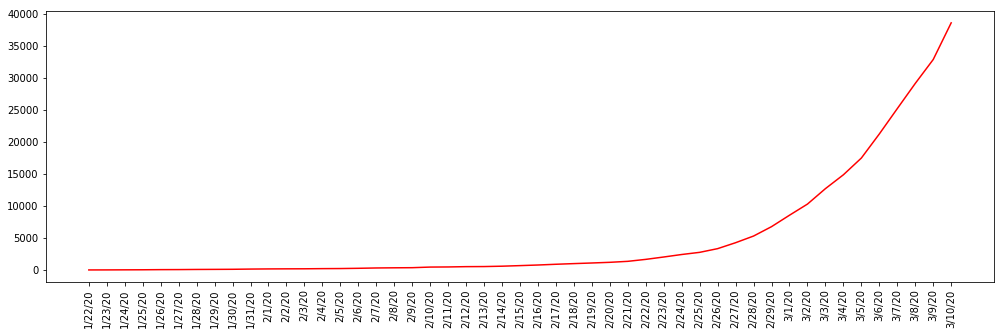

In [12]:
totals = timeseries_cases[timeseries_cases['Country/Region'] != 'Mainland China'].drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long']).sum(axis = 0, skipna = True) 

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(totals, c='r')

plt.xticks(rotation=90)
plt.show()

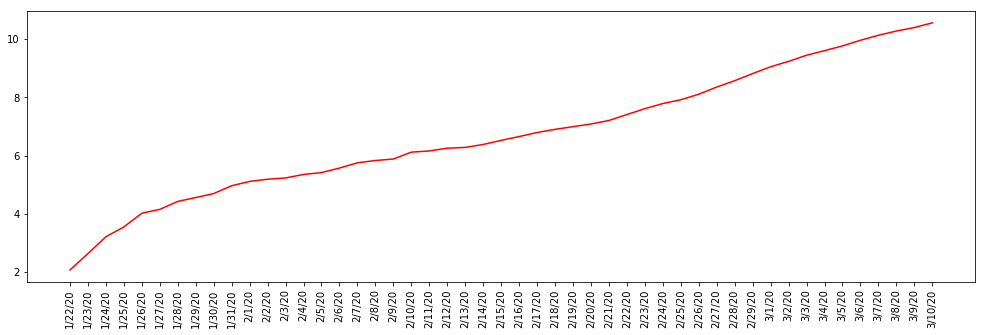

In [14]:
log_totals = np.log(totals)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(log_totals, c='r')

plt.xticks(rotation=90)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

cases_from_start = log_totals[log_totals > 0]

X = np.arange(1, len(cases_from_start) + 1, 1).reshape(-1, 1)
y = cases_from_start.values

log_res = LinearRegression()
log_res.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

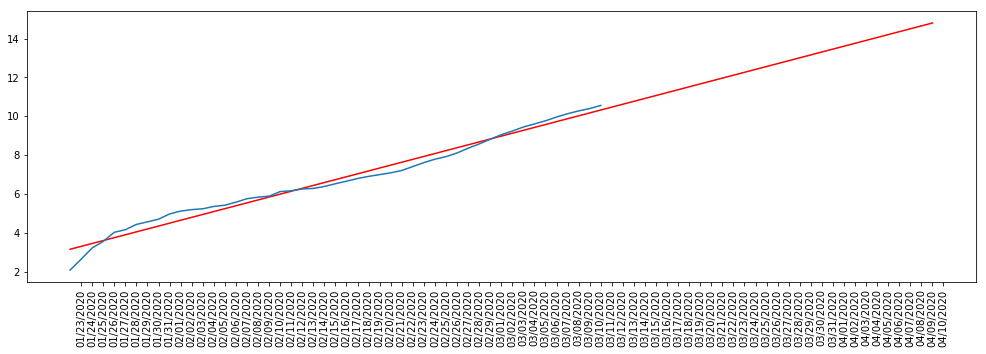

In [22]:
from datetime import datetime, timedelta

n_days = 30

predictions = log_res.predict(np.arange(1, len(cases_from_start) + 1 + n_days, 1).reshape(-1, 1))

start_datetime = datetime.strptime(cases_from_start.index[0], '%m/%d/%y')
days = []
current_day = start_datetime

for day in np.arange(1, len(cases_from_start) + 1 + n_days):
    current_day = current_day + timedelta(days=1)
    days.append(current_day.strftime('%m/%d/%Y'))
    
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions, c='r')
ax.set_xticks(np.arange(1, len(cases_from_start) + 1 + n_days, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start)
ax.plot()

plt.xticks(rotation=90)
plt.show()

[1482973. 1721996. 1999543. 2321825. 2696052.]


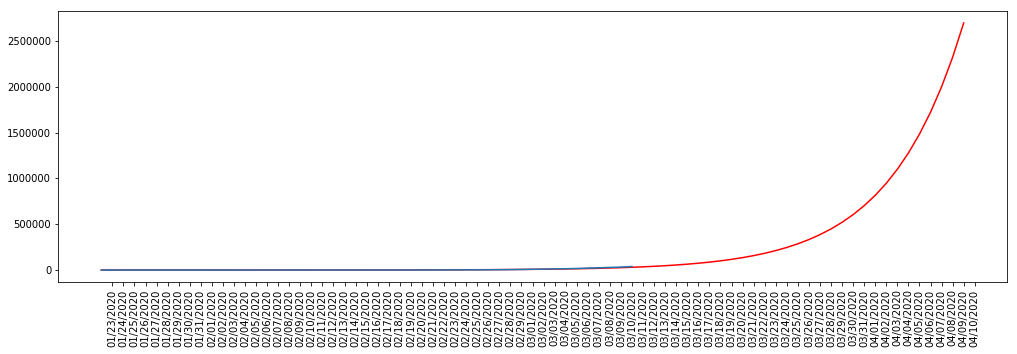

In [24]:
predictions_normal_scale = np.exp(predictions)
cases_from_start_normal = np.exp(cases_from_start)

fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(111)
ax.plot(predictions_normal_scale, c='r')
ax.set_xticks(np.arange(1, len(cases_from_start_normal) + 1 + n_days, 1))
ax.set_xticklabels(days)
ax.plot(cases_from_start_normal)
ax.plot()

print(np.round(predictions_normal_scale[-5:]))
plt.xticks(rotation=90)
plt.show()